# Modeling generalized tonic-clonic epileptic seizures with coupled Fitzhugh oscillators

### Yessica Orozco and Pablo Padilla

In [1]:
import scipy as sc
import matplotlib.pylab as plt
import sympy as sy
import math
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

## Previous work: FitzhHugh Model (without coupled oscillators)

$$ \dot{v} = c[v_i − w_i − \dfrac{1}{3}v^3_i ] + I $$

$$ \dot{w} =  d[a + bv_i - w_i] $$


## Nullclines 


$$ w_v =  v - v^3/3 + I/c  $$

$$  w_w = a + bv  $$

## Proposed system  (with coupled oscillators)

$$ \dot{v} = c[v_i − w_i − \dfrac{1}{3}v^3_i ] + \dfrac{K}{N}\sum_{j=1}^{N} sen(v_j - v_i) +I $$

$$ \dot{w} =  d[a + bv_i - w_i] $$



### The code used is the same for all cases, as the article indicates, it is only necessary to change the initial conditions or the coupling constant K to observe different behaviors. However, with the intention of being explicit with the parameters necessary to obtain each figure, a code is reported for each figure.

### Ki is the initial constante de acoplamiento reportada en el artículo como K, mientras que la constante de acoplamiento Kr en el artículo, está representada como el parámetro Kr.

# Figure 1 and 2. Code for two uncoupled oscillators K=0.
## The limit cycle and time versus potential (voltage) graph are shown.

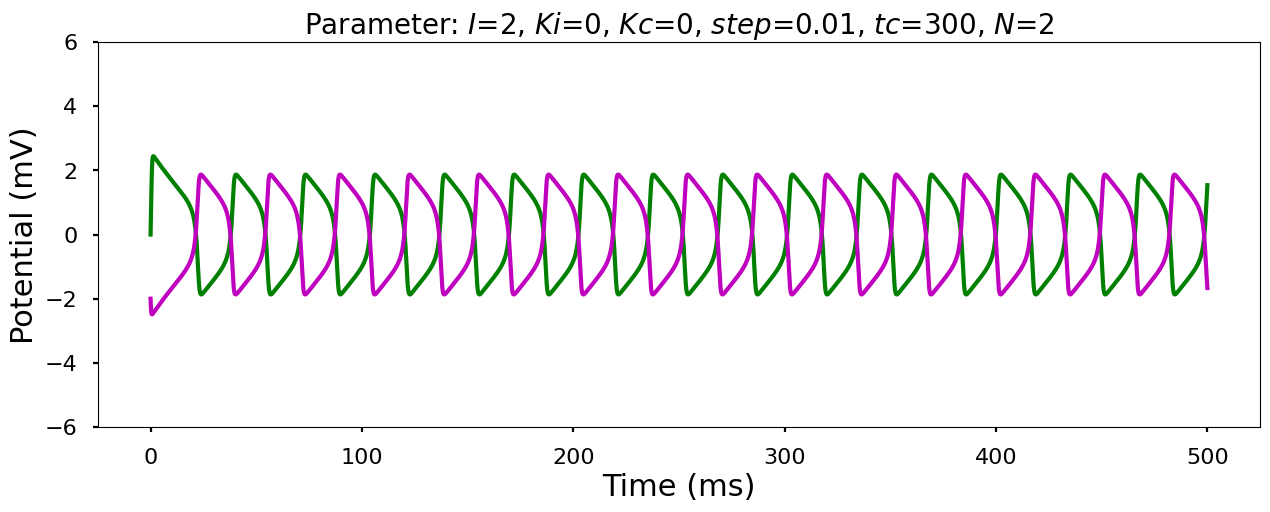

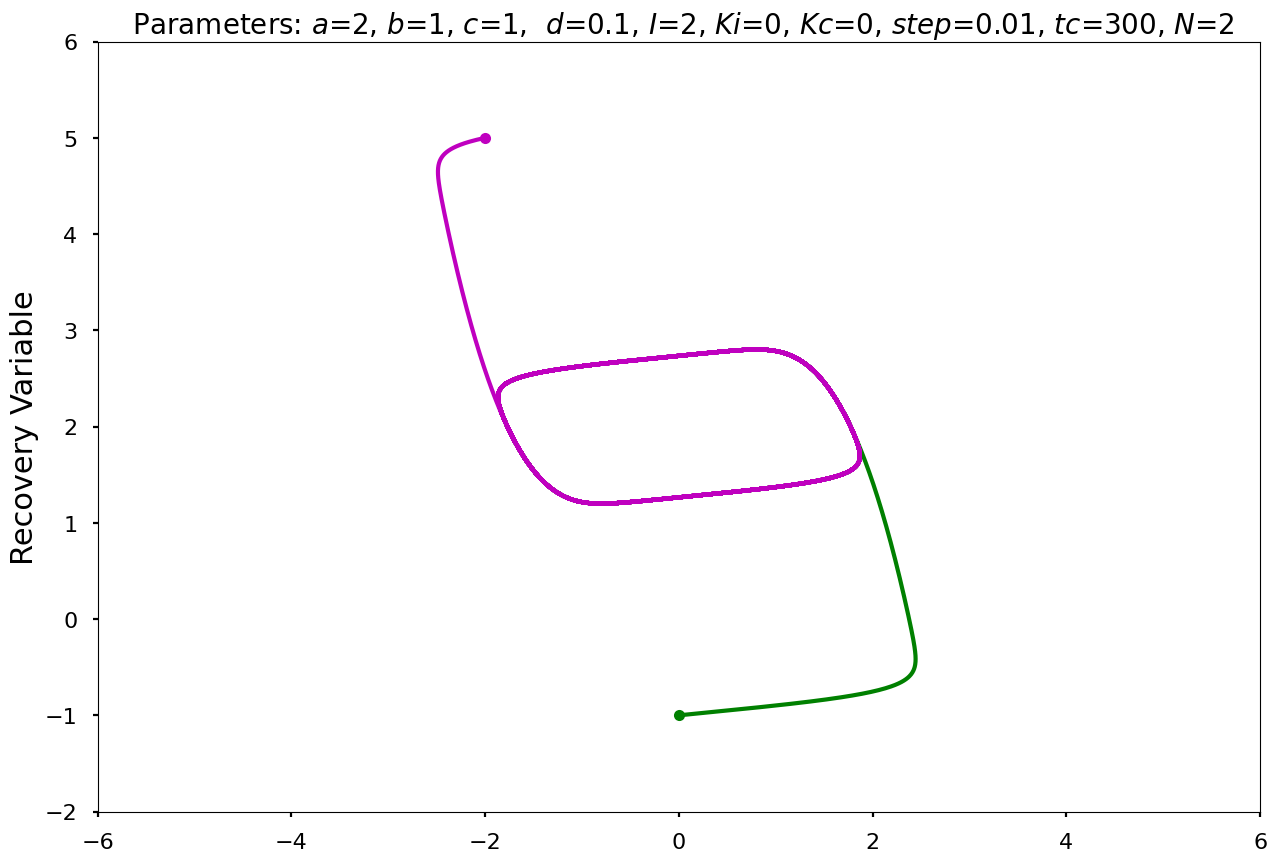

In [45]:
# We define the constants for the equations
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':0, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} 
CI = [0,-1,-2,5] 
tcambio =  (pars['tc']/pars['step'])

# We use Runge Kutta 4 to solve the differential equations
def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

# We define the differential equations and the necessary functions
def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
  
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
   
    
    return np.array([dV1,dW1,dV2,dW2])


# We solve for our initial conditions 

t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])

# The first graph will give us the potential as a function of time.
fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green',linewidth=3)
G.plot(t,sol[2],color='m',linewidth=3)
G.set_xlabel('Time (ms)',size = 22)
G.set_ylabel('Potential (mV)',size = 22)
G.set_title(  "Parameter: $I$=%g, $Ki$=%g, $Kr$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["I"], pars["Ki"], pars["Kr"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

G.set_ylim(-6,6)

# The second graph will give us the phase plane

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='green',linewidth=3) 
H.plot(sol[2],sol[3],color='m',linewidth=3) 
H.plot(CI[0], CI[1],'green', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'m', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H .set_ylabel('Recovery Variable',size = 22)
H.set_title(  " Parameters: $a$=%g, $b$=%g, $c$=%g,  $d$=%g, $I$=%g, $Ki$=%g, $Kr$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["a"], pars["b"], pars["c"], pars["d"], pars["I"], pars["Ki"], pars["Kr"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

H.set_xlim(-6,6)
H.set_ylim(-2,6)
gr.show()

# Figure 1 and 2. Code for two coupled oscillators K= 7.
## The limit cycle and time versus potential (voltage) graph are shown.

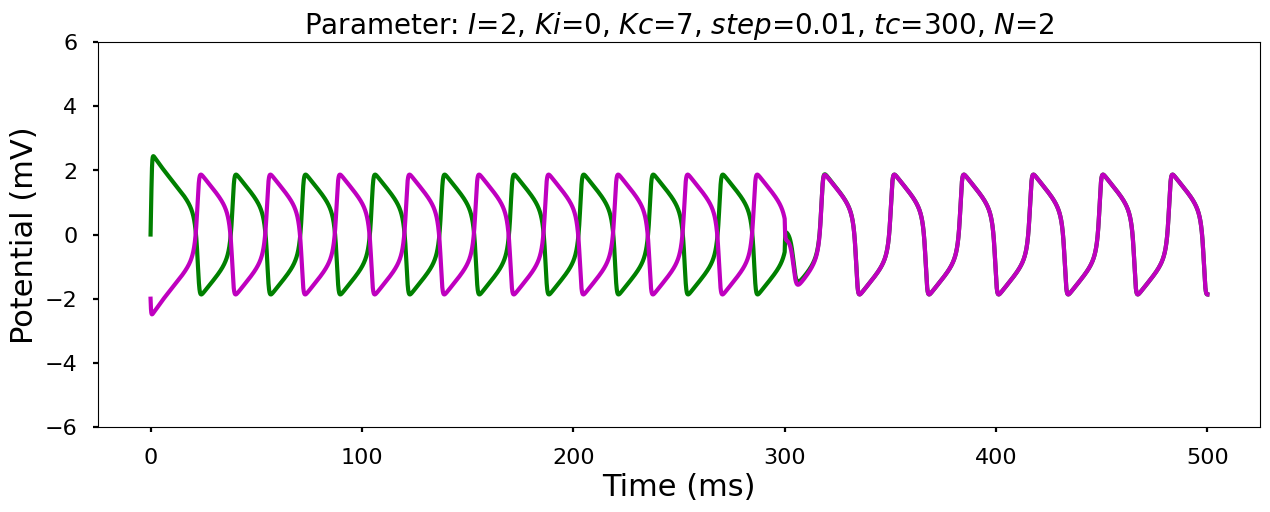

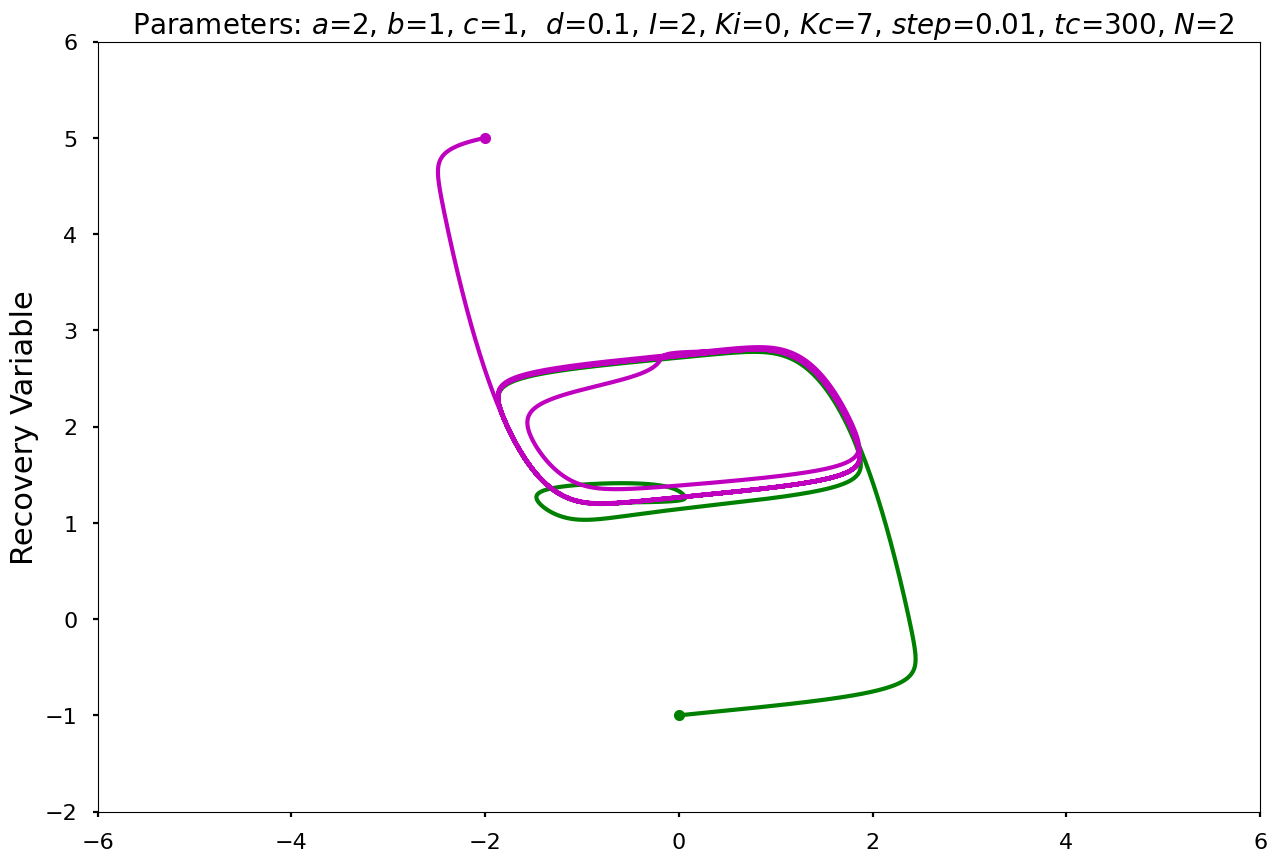

In [47]:
# We define the constants for the equations
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':7, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} 
CI = [0,-1,-2,5] 
tcambio =  (pars['tc']/pars['step'])


# We use Runge Kutta 4 to solve the differential equations
def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

# We define the differential equations and the necessary functions
def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
  
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
   
    
    return np.array([dV1,dW1,dV2,dW2])


# We solve for our initial conditions 

t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])

# The first graph will give us the potential as a function of time.
fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green',linewidth=3)
G.plot(t,sol[2],color='m',linewidth=3)
G.set_xlabel('Time (ms)',size = 22)
G.set_ylabel('Potential (mV)',size = 22)
G.set_title(  "Parameter: $I$=%g, $Ki$=%g, $Kr$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["I"], pars["Ki"], pars["Kr"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

G.set_ylim(-6,6)

# The second graph will give us the phase plane

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='green',linewidth=3) 
H.plot(sol[2],sol[3],color='m',linewidth=3) 
H.plot(CI[0], CI[1],'green', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'m', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H .set_ylabel('Recovery Variable',size = 22)
H.set_title(  " Parameters: $a$=%g, $b$=%g, $c$=%g,  $d$=%g, $I$=%g, $Ki$=%g, $Kr$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["a"], pars["b"], pars["c"], pars["d"], pars["I"], pars["Ki"], pars["Kr"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

H.set_xlim(-6,6)
H.set_ylim(-2,6)
gr.show()

# Figures  3 and 4. Code for four decoupled oscillators.
## The limit cycle and time versus potential (voltage) graph are shown.

In [2]:
import numpy as np
import matplotlib.pyplot as gr

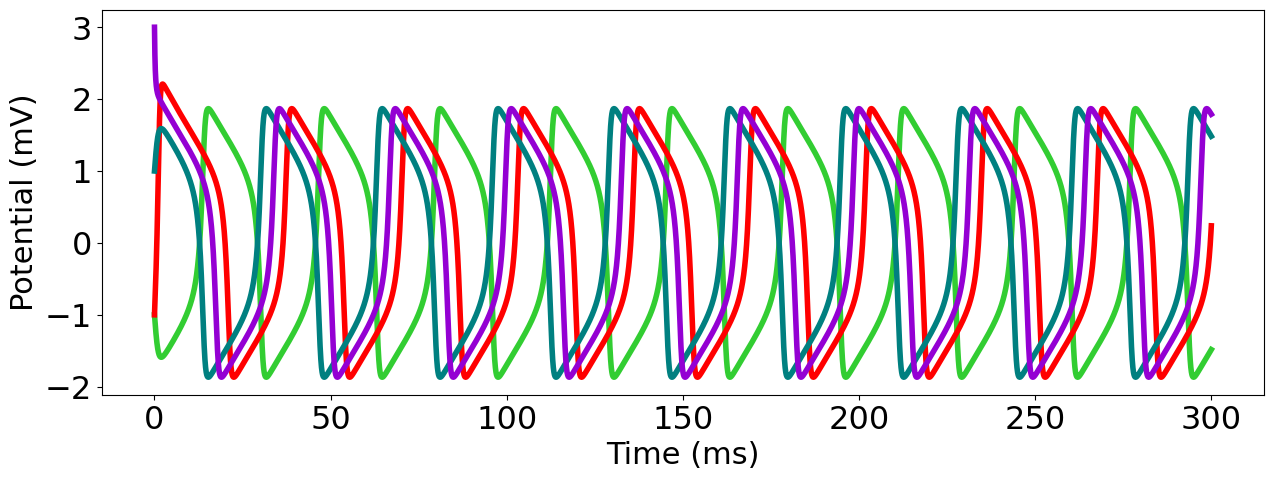

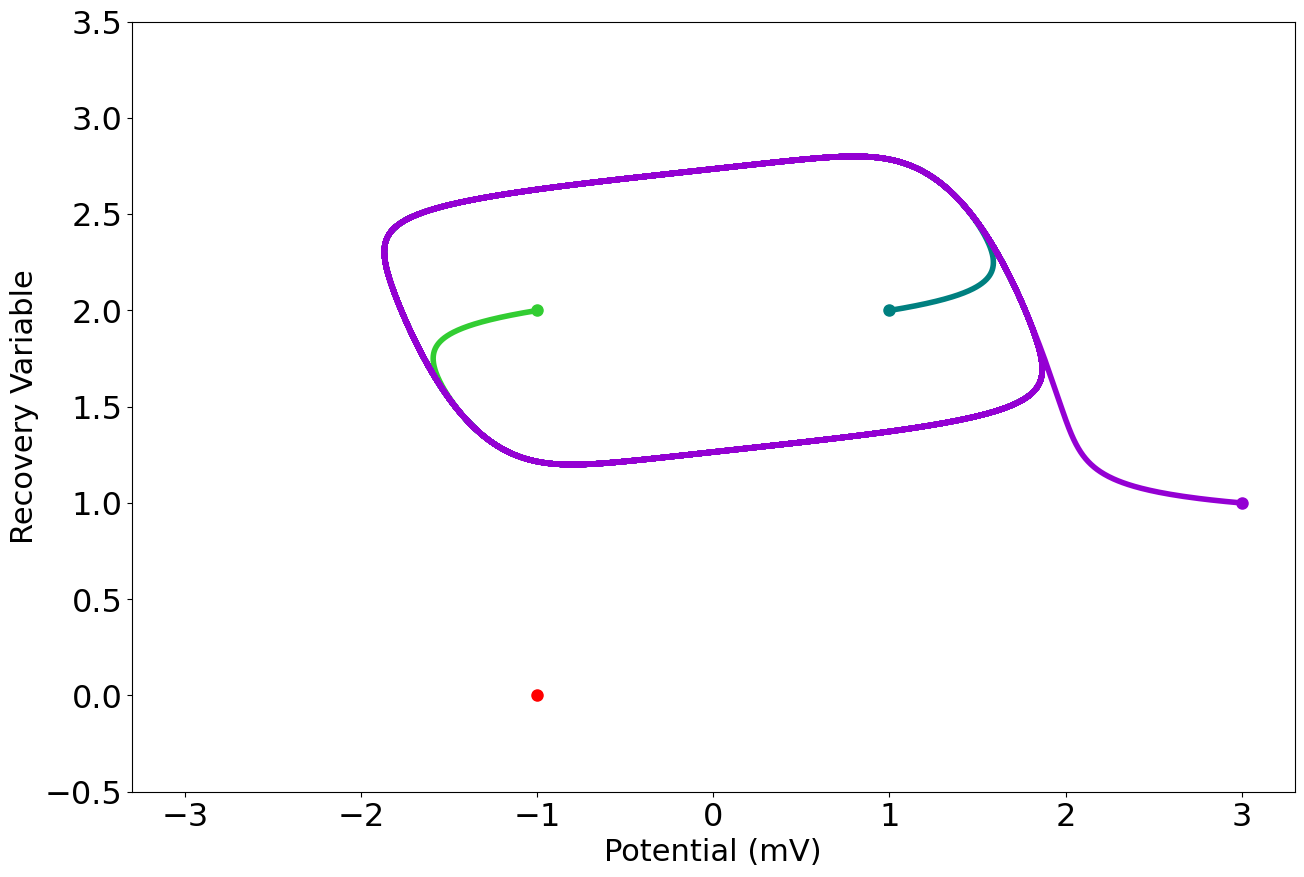

In [5]:

pars = {'a':2, 'b':1, 'c':1, 'd':0.1, 'I':2.0, 'step':0.01, 'ti':0, 'tf':300} 


def RK4(CI,F,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        k1 = F(U[i])*step
        k2 = F(U[i]+k1/2)*step
        k3 = F(U[i]+k2/2)*step
        k4 = F(U[i]+k3)*step
        U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()


def eqs(U):  #X=V y Y=W

    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) + pars['I']  
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)  
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)   
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) + pars['I'] 
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3)   
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) + pars['I'] 
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)  
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

CI = [-1,2,-1,0,1,2,3,1] 
t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,pars['ti'],pars['tf'],pars['step'])


fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='limegreen',linewidth=4)
G.plot(t,sol[2],color='red',linewidth=4)
G.plot(t,sol[4],color='teal',linewidth=4)
G.plot(t,sol[6],color='darkviolet',linewidth=4)
G.set_xlabel('Time (ms)' , size = 22)
G.set_ylabel('Potential (mV)' , size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='limegreen',linewidth=4) 
H.plot(sol[4],sol[5],color='teal',linewidth=4) 
H.plot(sol[6],sol[7],color='darkviolet',linewidth=4) 
H.plot(CI[0], CI[1],'limegreen', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'red', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.plot(CI[4], CI[5],'teal', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[4],CI[5]))
H.plot(CI[6], CI[7],'darkviolet', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[6],CI[7]))
H.set_xlabel('Potential (mV)' , size = 22)
H.set_ylabel('Recovery Variable' , size = 22)
H.set_xlim(-3.3,3.3)
H.set_ylim(-0.5,3.5)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
gr.show()

# Figures  3 and 4. Code for four  coupled oscillators.
## The limit cycle and time versus potential (voltage) graph are shown.

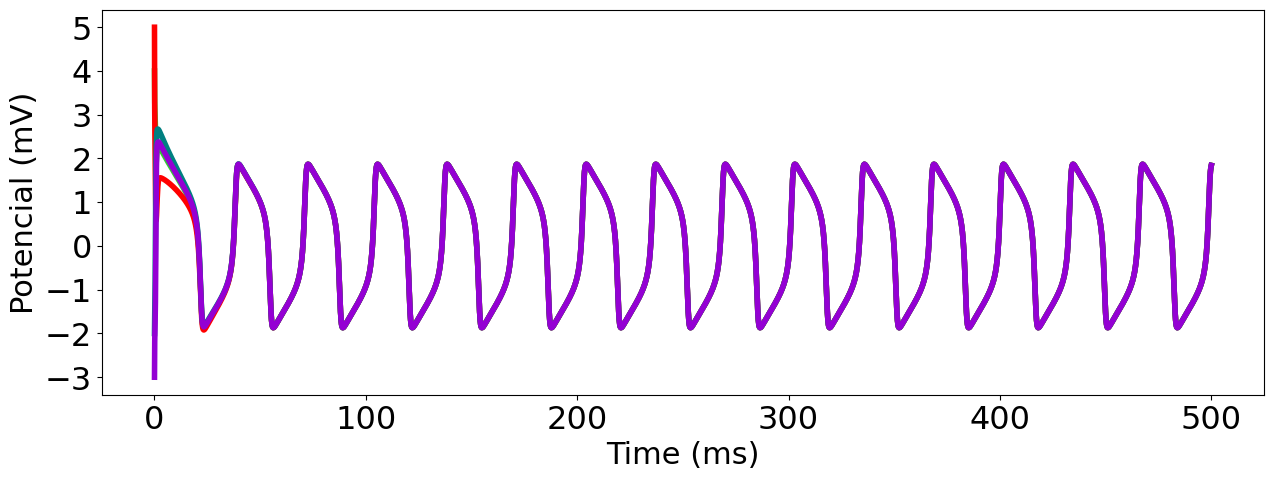

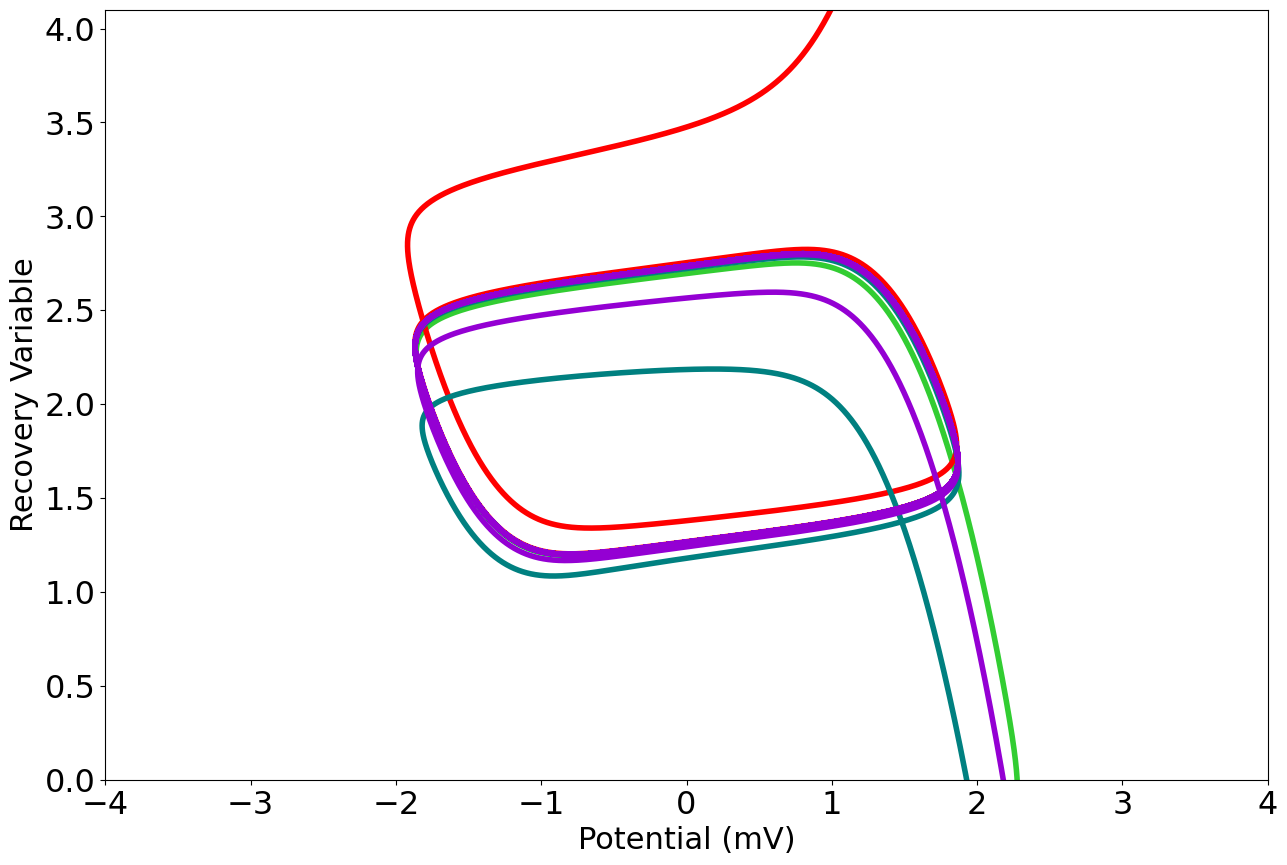

Initial conditions used:
[4, -1, 5, 7, -2, -6, -3, -2]


In [8]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'K':7.1, 'N':8,'I':2.0, 'step':0.01, 'ti':0, 'tf':500}
CI = [4,-1,5,7,-2,-6,-3,-2]
def RK4(CI,F,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        k1 = F(U[i])*step
        k2 = F(U[i]+k1/2)*step
        k3 = F(U[i]+k2/2)*step
        k4 = F(U[i]+k3)*step
        U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W

    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['K']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['K']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['K']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['K']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,pars['ti'],pars['tf'],pars['step'])

fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='limegreen',linewidth=4)
G.plot(t,sol[2],color='red',linewidth=4)
G.plot(t,sol[4],color='teal',linewidth=4)
G.plot(t,sol[6],color='darkviolet',linewidth=4)
G.set_xlabel('Time (ms)', size = 22)
G.set_ylabel('Potencial (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='limegreen',linewidth=4) 
H.plot(sol[2],sol[3],color= 'red',linewidth=4) 
H.plot(sol[4],sol[5],color='teal',linewidth=4) 
H.plot(sol[6],sol[7],color='darkviolet',linewidth=4) 
H.plot(CI[0], CI[1],'limegreen', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'red', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.plot(CI[4], CI[5],'teal', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[4],CI[5]))
H.plot(CI[6], CI[7],'darkviolet', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[6],CI[7]))
H.set_xlabel('Potential (mV)', size = 22)
H.set_ylabel('Recovery Variable', size = 22)

H.set_xlim(-4,4)
H.set_ylim(0,4.1)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
gr.show()

print('Initial conditions used:')
print(CI)

# Figure 5.  Graph two four oscillators  N= 2.

In [14]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1060619/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


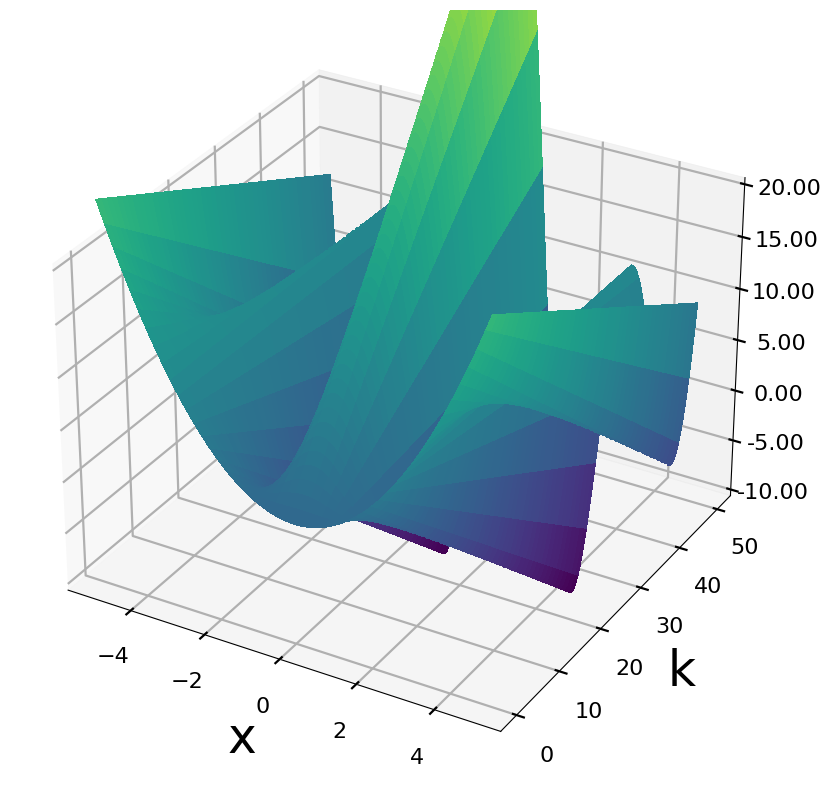

In [16]:

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

X = np.arange(-5, 5, 0.05) 
Y = np.arange(0, 50, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2+1+(Y/2)*(np.cos(2*X) + np.cos(X)) 


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 20) 
ax.set_xlabel('x',fontsize = 35,labelpad=20)
ax.set_ylabel('k',fontsize = 35,labelpad=20)

ax.zaxis.set_major_formatter('{x:.02f}')


plt.show()

# Figure 6. Graph for four oscillators  N= 4.

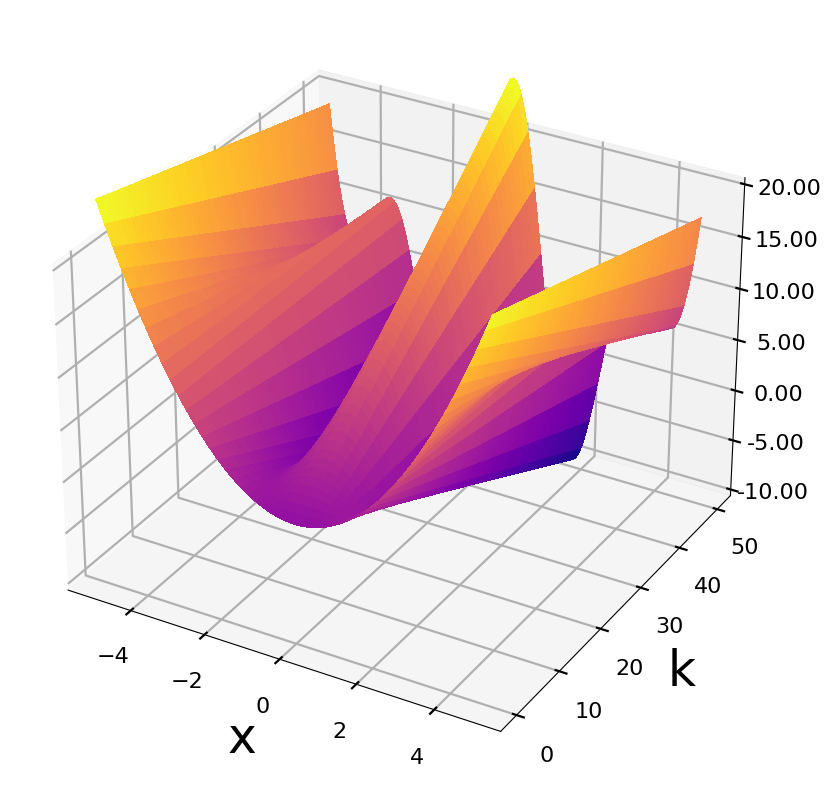

In [15]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

#Grid
X = np.arange(-5, 5, 0.05) 
Y = np.arange(0, 50, 0.05) 
X, Y = np.meshgrid(X, Y)
Z = X**2+1+(Y/4)*(np.cos(2*X) + np.cos(X))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='plasma',linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 20) 
ax.set_xlabel('x',fontsize = 35,labelpad=20)
ax.set_ylabel('k',fontsize = 35,labelpad=20)
ax.zaxis.set_major_formatter('{x:.02f}')

plt.show()

# Figure 7.  Code for two oscillators with changes in the coupling constant.

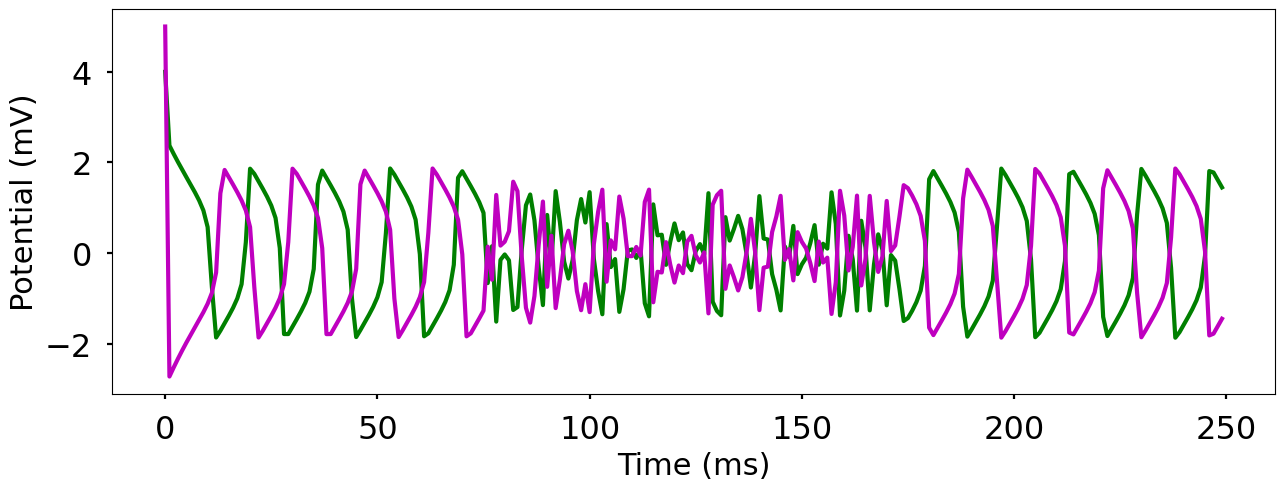

In [31]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':495, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':150,'tc2':340,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI =  [4,-1,5,7] 

tcambio =  (pars['tc']/pars['step'])
tcambio2 =  (pars['tc2']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        elif i <= tcambio2:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)     
    
    return np.array([dV1,dW1,dV2,dW2])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])


v1 = sol[0]
v2 = sol[2] 
v1b = []
v2b = []
    
for i in range (0,50000-1,200):
    x =  v1[i] 
    v1b.append(x)
    y =  v2[i]
    v2b.append(y)

t2 = np.arange(0,250)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,v1b,color='green',linewidth=3)
M.plot(t2,v2b,color='m',linewidth=3)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
gr.show()

x= []

# Figure 7. Code for four oscillators with changes in the coupling constant.

largo del voltaje ictal 500


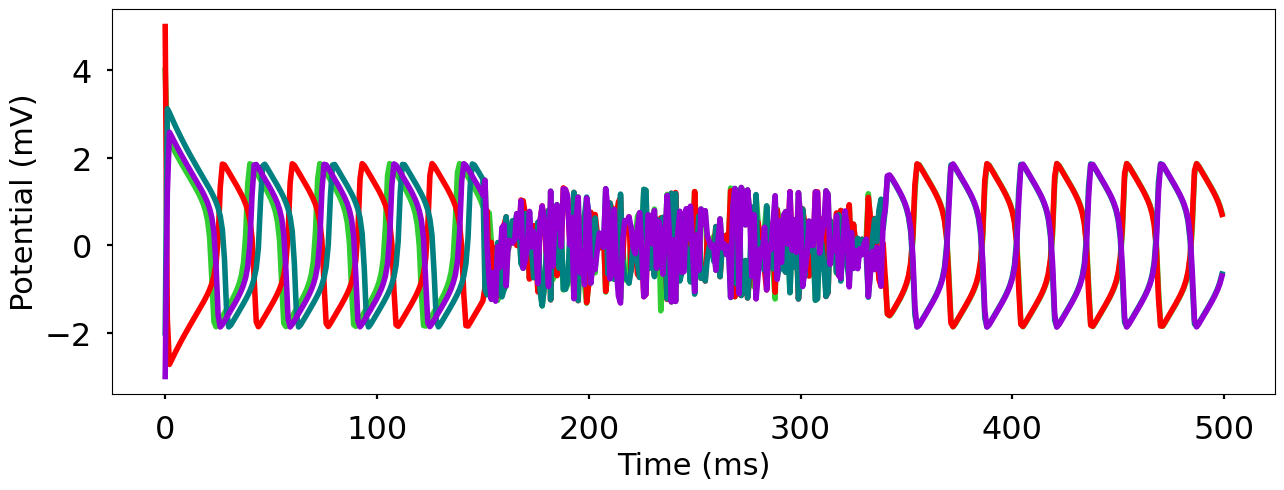

In [28]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':490, 'N':8, 'I':2.0, 'step':0.01, 'ti':0,'tc':150,'tc2':340,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI =  [4,-1,5,7,-2,-6,-3,-2] 
tcambio =  (pars['tc']/pars['step'])
tcambio2 =  (pars['tc2']/pars['step'])

#7 Usamos un RK4 para resolver las ecuaciones diferenciales
def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        elif i <= tcambio2:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

#8 Definimos las ecs diferenciales y las funciones necesarias
def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3)
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)    
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])


solution0 = sol[0]
solution2 = sol[2]
solution4 = sol[4]
solution6 = sol[6]

sol_voltaje0 = []
sol_voltaje2 = []
sol_voltaje4 = []
sol_voltaje6 = []

for i in range (0,50000-1,100):
    v = solution0[i] 
    sol_voltaje0.append(v)
    w = solution2[i]
    sol_voltaje2.append(w)
    x = solution4[i]
    sol_voltaje4.append(x)
    y = solution6[i]
    sol_voltaje6.append(y)
print('largo del voltaje ictal',len(sol_voltaje2),) 

t2 = np.arange(0,500)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,sol_voltaje0,color='limegreen', linewidth=4)
M.plot(t2,sol_voltaje2,color='red', linewidth=4)
M.plot(t2,sol_voltaje4,color='teal', linewidth=4)
M.plot(t2,sol_voltaje6,color='darkviolet', linewidth=4)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

gr.show()

x= []

# Figure 8. Code for two oscillators with changes in the coupling constant.

largo del voltaje ictal 250


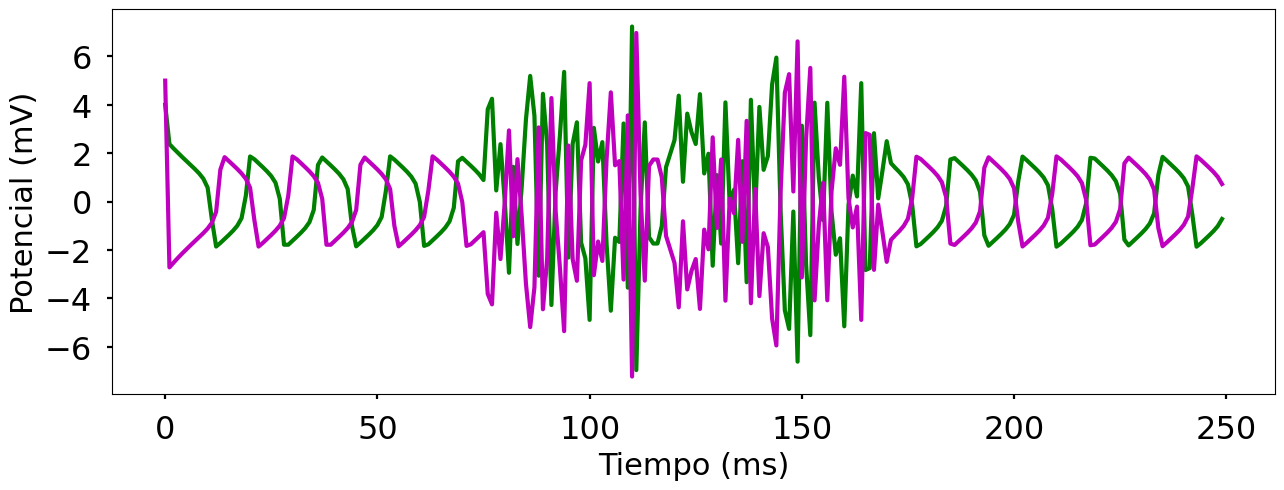

In [23]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':890, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':150,'tc2':340,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI =  [4,-1,5,7] 


tcambio =  (pars['tc']/pars['step'])
tcambio2 =  (pars['tc2']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        elif i <= tcambio2:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)     
    
    return np.array([dV1,dW1,dV2,dW2])


#9 Resolvemos para nuestras condiciones inicales
t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])


 # VOLTAJE ICTAL
v1 = sol[0]
v2 = sol[2] 
v1b = []
v2b = []
    
for i in range (0,50000-1,200):
    x =  v1[i] 
    v1b.append(x)
    y =  v2[i]
    v2b.append(y)
print('largo del voltaje ictal',len(v1b),) 

t2 = np.arange(0,250)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,v1b,color='green',linewidth=3)
M.plot(t2,v2b,color='m',linewidth=3)
M.set_xlabel('Tiempo (ms)', size = 22)
M.set_ylabel('Potencial (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
gr.show()

x= []

# Figure 8. Code for four oscillators,  with changes in the coupling constant.

largo del voltaje ictal 500


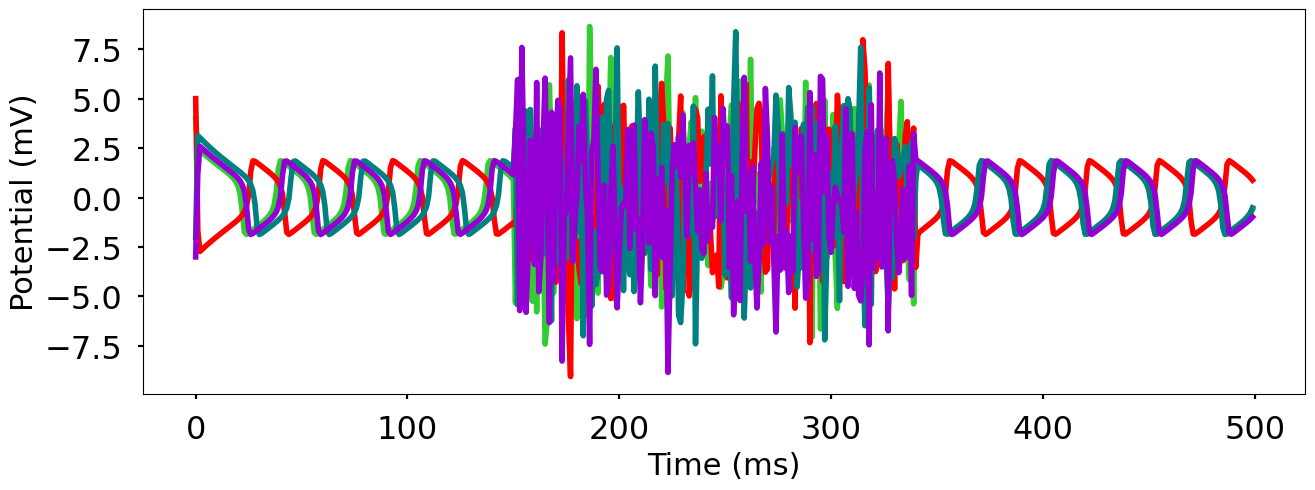

In [34]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':995, 'N':8, 'I':2.0, 'step':0.01, 'ti':0,'tc':150,'tc2':340,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI =  [4,-1,5,7,-2,-6,-3,-2] 
tcambio =  (pars['tc']/pars['step'])
tcambio2 =  (pars['tc2']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        elif i <= tcambio2:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3)
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)    
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])



 # ICTAL VOLTAGE
solution0 = sol[0]
solution2 = sol[2]
solution4 = sol[4]
solution6 = sol[6]

sol_voltaje0 = []
sol_voltaje2 = []
sol_voltaje4 = []
sol_voltaje6 = []

for i in range (0,50000-1,100):
    v = solution0[i] 
    sol_voltaje0.append(v)
    w = solution2[i]
    sol_voltaje2.append(w)
    x = solution4[i]
    sol_voltaje4.append(x)
    y = solution6[i]
    sol_voltaje6.append(y)
print('largo del voltaje ictal',len(sol_voltaje2),) 

t2 = np.arange(0,500)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,sol_voltaje0,color='limegreen', linewidth=4)
M.plot(t2,sol_voltaje2,color='red', linewidth=4)
M.plot(t2,sol_voltaje4,color='teal', linewidth=4)
M.plot(t2,sol_voltaje6,color='darkviolet', linewidth=4)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

gr.show()

x= []

# Figure 9. Separe plots from the Figure 8.

## To generate each plot is necesary to erase the # symbol, for each oscillator, while keep the others commented.

(array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ]),
 [Text(0, -10.0, '−10.0'),
  Text(0, -7.5, '−7.5'),
  Text(0, -5.0, '−5.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0')])

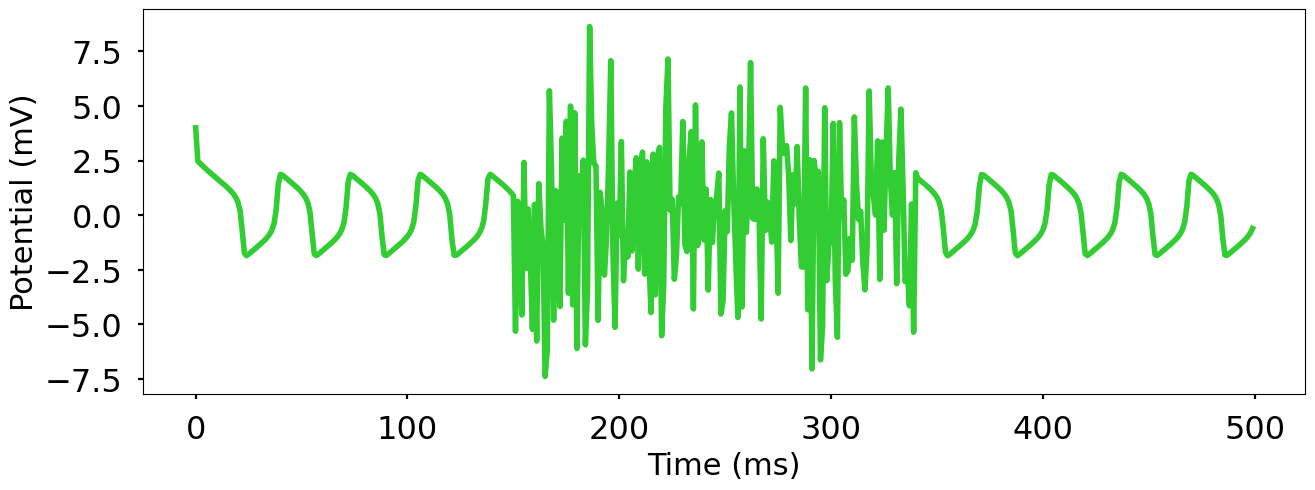

In [35]:
fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,sol_voltaje0,color='limegreen', linewidth=4)
#M.plot(t2,sol_voltaje2,color='red', linewidth=4)
#M.plot(t2,sol_voltaje4,color='teal', linewidth=4)
#M.plot(t2,sol_voltaje6,color='darkviolet', linewidth=4)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

# Figure 10 Code for four oscillators, with K < 7.1, the oscillators get coupled

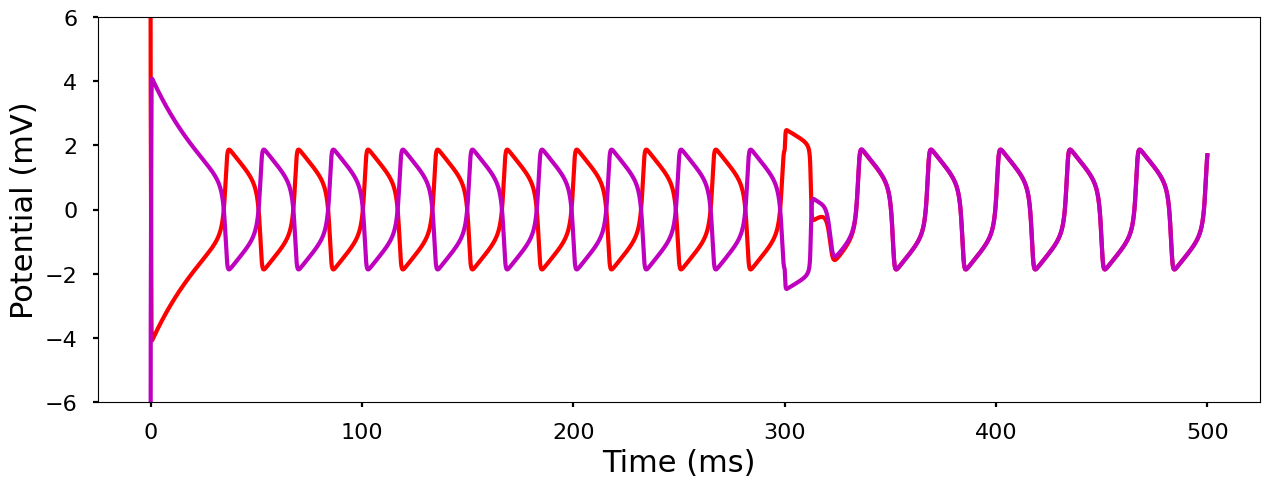

In [43]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':5, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI =  [21,22,-17,-18]
tcambio =  (pars['tc']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
  
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Change K por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
   
    
    return np.array([dV1,dW1,dV2,dW2])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])

fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='red',linewidth=3)
G.plot(t,sol[2],color='m',linewidth=3)
G.set_xlabel('Time (ms)',size = 22)
G.set_ylabel('Potential (mV)',size = 22)

G.set_ylim(-6,6)
gr.show()


# Figure 10. Code for two oscillators, with K >= 7.1, the oscillators present the oscillator death.

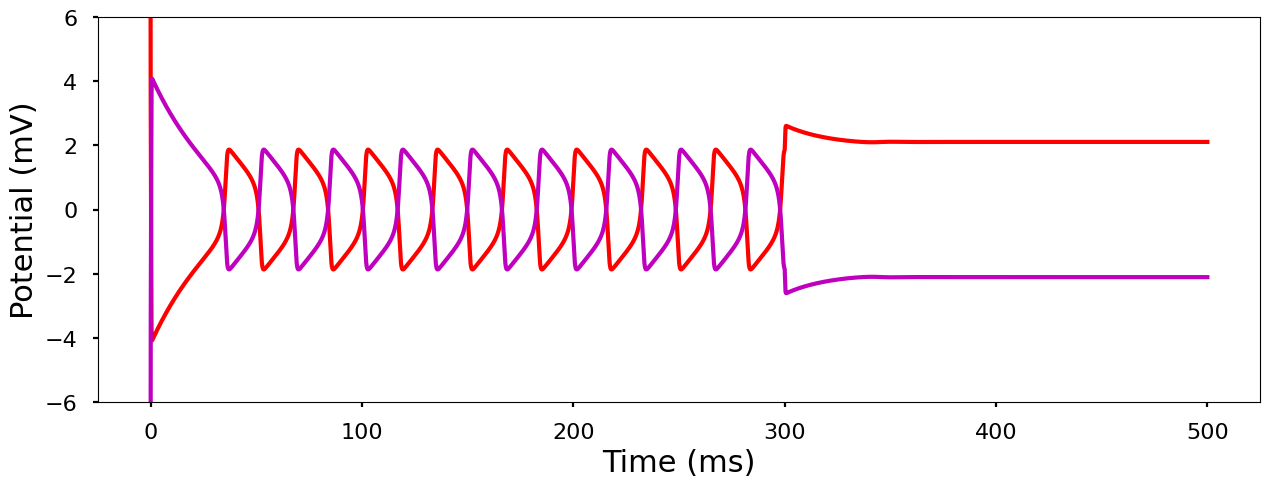

In [44]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':7.1, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI = [21,22,-17,-18]
tcambio =  (pars['tc']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
  
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Change K por Kr
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
   
    
    return np.array([dV1,dW1,dV2,dW2])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])

fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='red',linewidth=3)
G.plot(t,sol[2],color='m',linewidth=3)
G.set_xlabel('Time (ms)',size = 22)
G.set_ylabel('Potential (mV)',size = 22)

G.set_ylim(-6,6)
gr.show()

# Figure 11. Code for four oscillators, with K < 7.1, the oscillators get coupled.

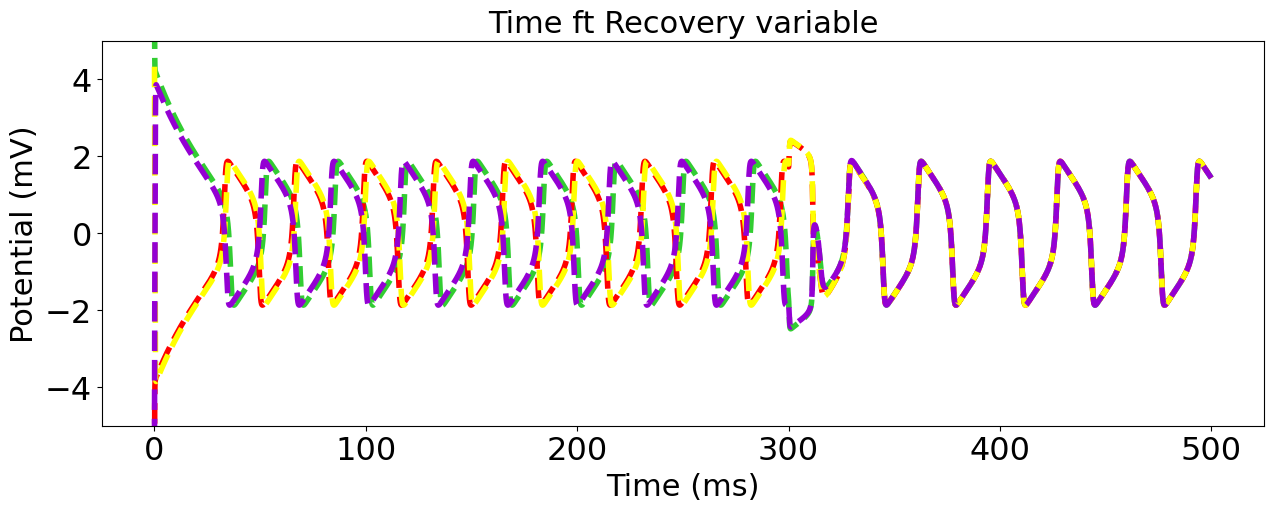

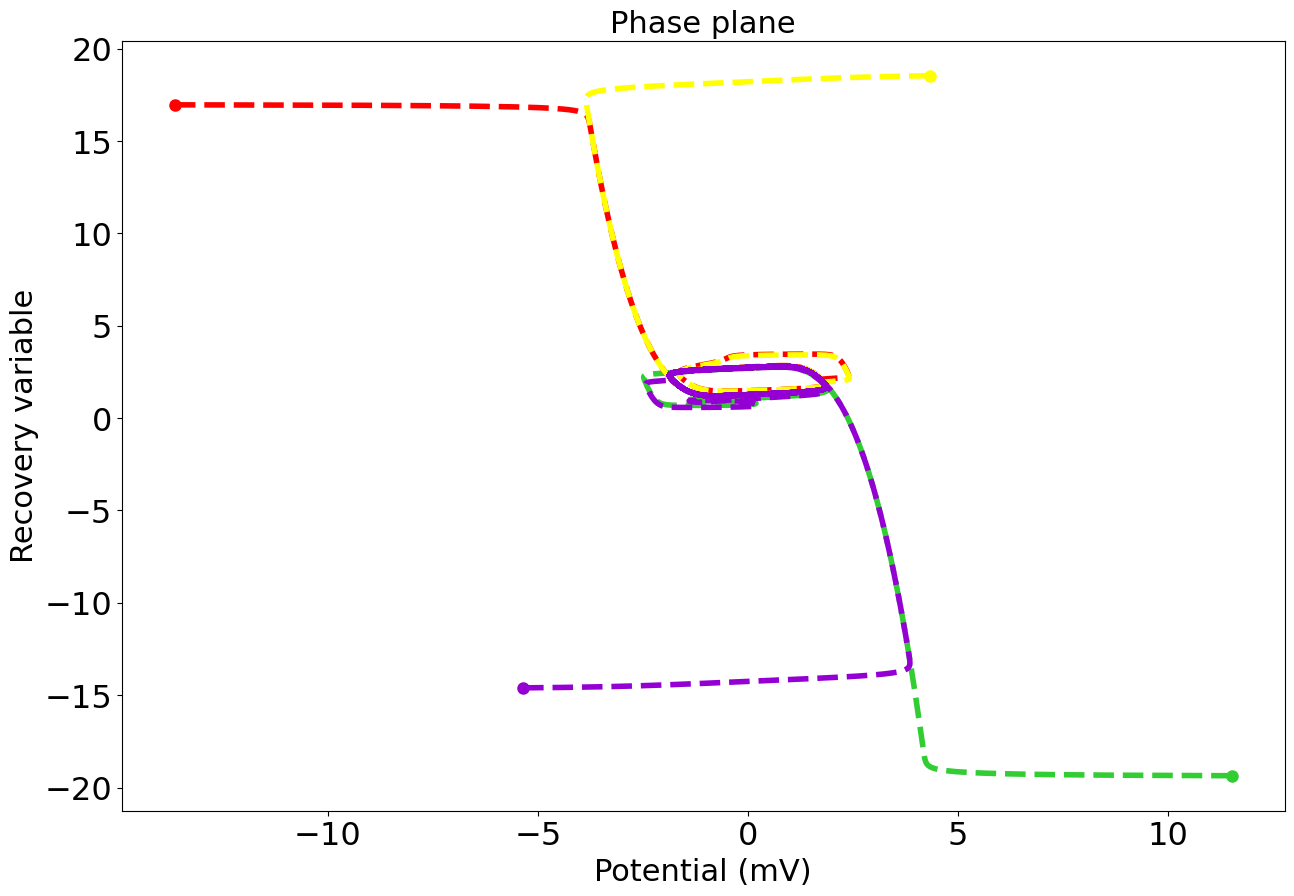

Initial conditions used:
[11.517455691609122, -19.360586585219824, -13.645330499276952, 16.95714106286367, 4.324597285320531, 18.53217231152614, -5.354573194042228, -14.603409472607778]


In [11]:
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':5, 'N':8, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM

CI = [11.517455691609122, -19.360586585219824, -13.645330499276952, 16.95714106286367, 4.324597285320531, 18.53217231152614, -5.354573194042228, -14.603409472607778]

tcambio =  (pars['tc']/pars['step'])

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI #8
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3)
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)    
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step']) 
fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='limegreen', linewidth=4, linestyle='--')
G.plot(t,sol[2],color='red', linewidth=4, linestyle='--')
G.plot(t,sol[4],color='yellow', linewidth=4, linestyle='--')
G.plot(t,sol[6],color='darkviolet', linewidth=4, linestyle='--')
G.set_xlabel('Time (ms)', size = 22)
G.set_ylabel('Potential (mV)', size = 22)
G.set_ylim(-5,5)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
G.set_title("Time ft Recovery variable",size = 22) 

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='limegreen', linewidth=4, linestyle='--') # traza los ciclos limite
H.plot(sol[2],sol[3],color='red', linewidth=4, linestyle='--') 
H.plot(sol[4],sol[5],color='yellow', linewidth=4, linestyle='--') 
H.plot(sol[6],sol[7],color='darkviolet', linewidth=4, linestyle='--') 
H.plot(CI[0], CI[1],'limegreen', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'red', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.plot(CI[4], CI[5],'yellow', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[4],CI[5]))
H.plot(CI[6], CI[7],'darkviolet', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[6],CI[7]))
H.set_xlabel('Potential (mV)', size = 22)
H.set_ylabel('Recovery variable' ,size = 22)
H.set_title("Phase plane",size = 22) 
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

gr.show()

print('Initial conditions used:')
print(CI)

x= []

# Figure 11. Code for four oscillators, with K >= 7.1, the oscillators present the oscillator death.


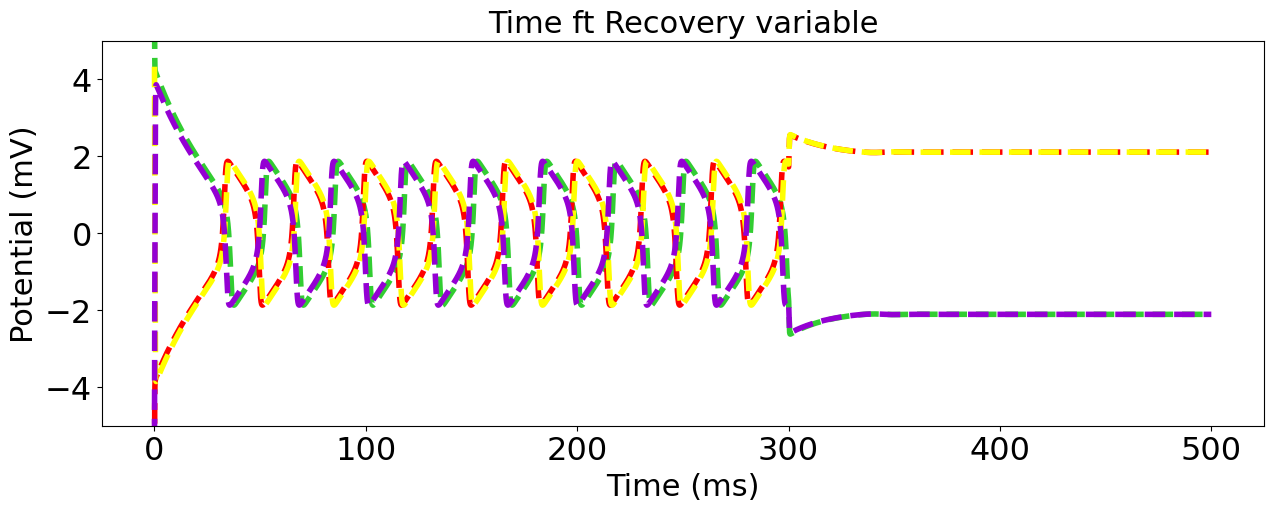

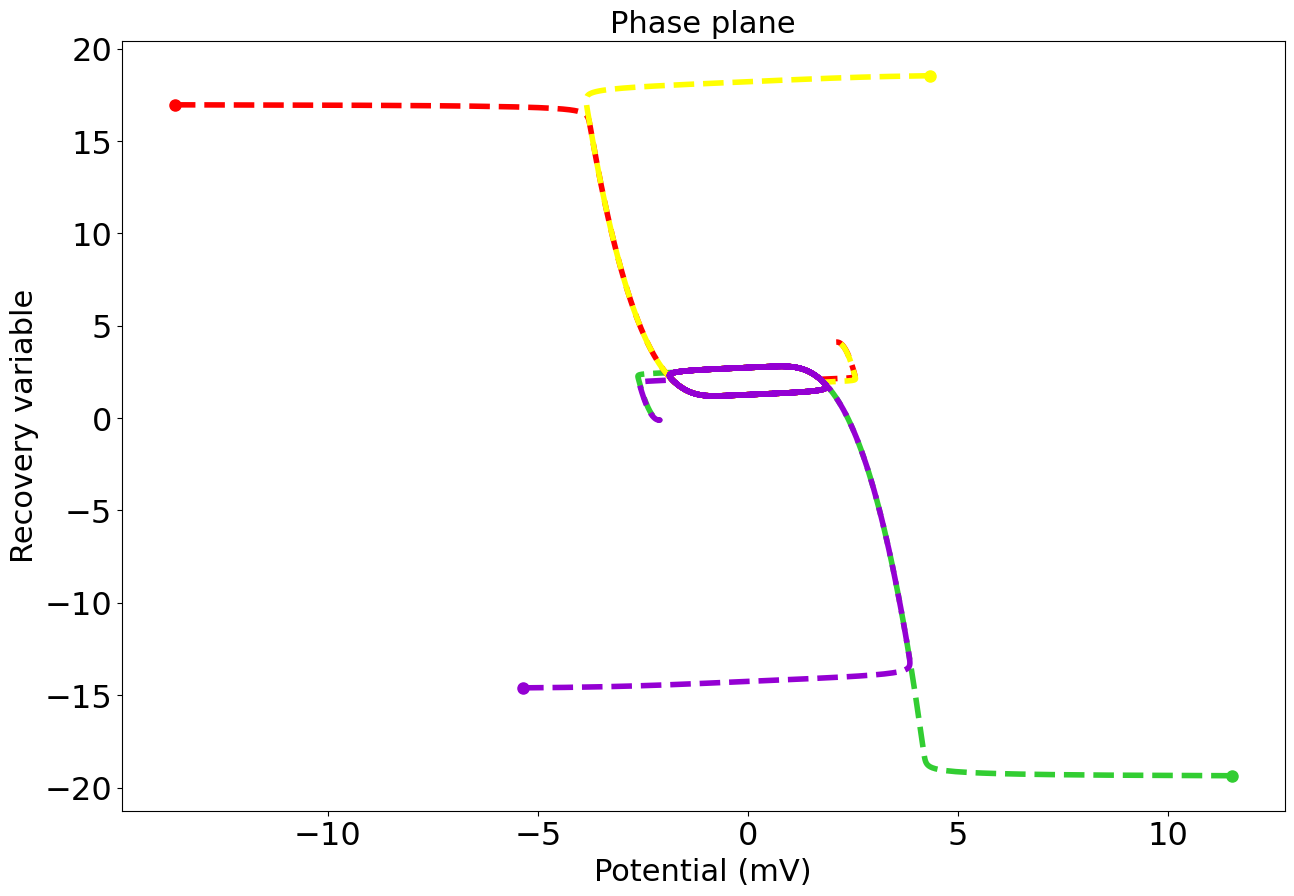

Initial conditions used:
[11.517455691609122, -19.360586585219824, -13.645330499276952, 16.95714106286367, 4.324597285320531, 18.53217231152614, -5.354573194042228, -14.603409472607778]


In [12]:

pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kr':7.1, 'N':8, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI = [11.517455691609122, -19.360586585219824, -13.645330499276952, 16.95714106286367, 4.324597285320531, 18.53217231152614, -5.354573194042228, -14.603409472607778]



tcambio =  (pars['tc']/pars['step'])


def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI #8
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()


def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3)
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kr
    V1,W1,V2,W2,V3,W3,V4,W4 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) + pars['I']
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) +  (pars['Kr']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) + pars['I']
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)    
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])


t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])
fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='limegreen', linewidth=4, linestyle='--')
G.plot(t,sol[2],color='red', linewidth=4, linestyle='--')
G.plot(t,sol[4],color='yellow', linewidth=4, linestyle='--')
G.plot(t,sol[6],color='darkviolet', linewidth=4, linestyle='--')
G.set_xlabel('Time (ms)', size = 22)
G.set_ylabel('Potential (mV)', size = 22)
G.set_ylim(-5,5)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
G.set_title("Time ft Recovery variable",size = 22) 

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='limegreen', linewidth=4, linestyle='--') # traza los ciclos limite
H.plot(sol[2],sol[3],color='red', linewidth=4, linestyle='--') 
H.plot(sol[4],sol[5],color='yellow', linewidth=4, linestyle='--') 
H.plot(sol[6],sol[7],color='darkviolet', linewidth=4, linestyle='--') 
H.plot(CI[0], CI[1],'limegreen', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'red', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.plot(CI[4], CI[5],'yellow', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[4],CI[5]))
H.plot(CI[6], CI[7],'darkviolet', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[6],CI[7]))
H.set_xlabel('Potential (mV)', size = 22)
H.set_ylabel('Recovery variable' ,size = 22)
H.set_title("Phase plane",size = 22) 
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)

gr.show()

print('Initial conditions used:')
print(CI)

x= []